In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt

#<img src="pixels.jpg" width="500">

In [2]:
#ABCD ray trace function
def ABCD_trace(a,zf, zf_type):
    #a: starting vector a=np.array([[height],[angle]])
    #zf: free space and lens focal lengths
    #zf_type: type of optical element ('z' for free space, 'f' for lens)
    #return matrix of y, z

    #check to make sure the passed arrays match in length
    if np.size(zf) != len(zf_type):
        print("zf and zf_type arrays do not match")
        return None

    trace=np.array([[a[0,0]], [0]])
    for ind in range(len(zf_type)):

        if zf_type[ind] == 'z':
            #free space propagation
            M1 = np.array([[1.0, zf[ind]], [0.0, 1.0]])
            a=M1@a
            #add new point to trace matrix
            y=a[0,0]
            z=trace[1, -1]+zf[ind]
            new_point = np.array([[y], 
                                  [z]])
            # Append column-wise
            trace = np.hstack((trace, new_point))
            
        elif zf_type[ind] == 'f':
            #free space propagation
            M1 = np.array([[1.0, 0.0], [-1/zf[ind], 1.0]])
            a=M1@a
            #Don't append to the trace
            #No ray travel

        else:
            print("Invalid zf_type")
            return None
    return trace

## Afocal

Rifle scope, binoculars, surgical loupes are all applications that are opical systems that do not focus.  

<img src="scope.jpg" width="300"> <img src="Binocular.jpg" width="300"> <img src="loupe.jpg" width="300">

In these applications the eye focuses the object to an image (on the retina).  Afocals are two lenses separated by the sum of the focal lengths.  

Two main simple configurations.
1. Keplar: positive focal lengths
2. Galilean: One positive and one negative

## Keplar

Two lenses with positive focal length.  The separation of the lenses is the sum of the two focal lengths.

Plot a parallel bundle of rays through the lens system.

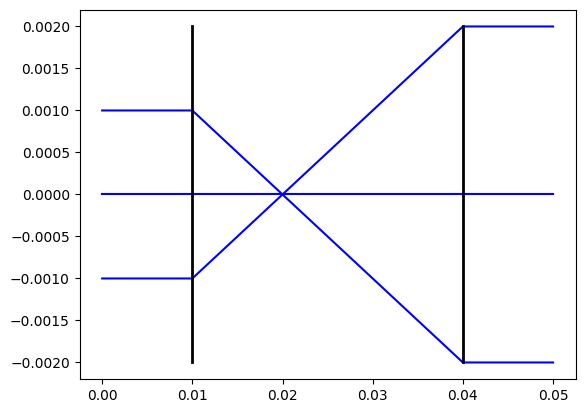

In [3]:
f1=10e-3  #focal length in meters
f2=20e-3  #focal length in meters
D=2e-3
#plot a set of parallel rays through an optical system
zf=np.array([f1, f1, f1+f2, f2, 0.5*f2])  #free space and lens focal lengths
zf_type=['z', 'f', 'z', 'f', 'z']

th1=0
H1=D/2
H2=-D/2
a=np.array([[H1], [th1]])  #initial ray height 10
trace=ABCD_trace(a,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]

a=np.array([[H2], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z2=trace[1,:]
y2=trace[0,:]

a=np.array([[0], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z3=trace[1,:]
y3=trace[0,:]

z_lens1=np.array([f1, f1])
y_lens1=np.array([-D, D])

z_lens2=np.array([2*f1+f2, 2*f1+f2])
y_lens2=np.array([-D, D])


plt.plot(z1, y1, 'b')
plt.plot(z2, y2, 'b')
plt.plot(z3, y3, 'b')
plt.plot(z_lens1, y_lens1, 'k', linewidth=2)
plt.plot(z_lens2, y_lens2, 'k', linewidth=2)
plt.show()


1. A parallel set of rays go through the focus of the first lens $z_1=f_1$
2. The distance from the focal rays to lens 2 is $z_2=f_2$.  This means that all of the rays will come out parallel.
3. The beam size changes by the ratio of the focal lengths.  $Ratio=\frac{f_2}{f_1}$

This can be used to increase or decrease the size of a beam.  

Now let's look at the effect of the afocal on the incident angle.

<div style="border:4px solid red">

**HW1:** Use $f_1=10mm$, $f_2=20mm$, lens separation $z_2=f_1+f_2=30mm$, beam width $D=2mm$, and incident angle $\theta=0.1$.  Create a plot of the ray bundle.

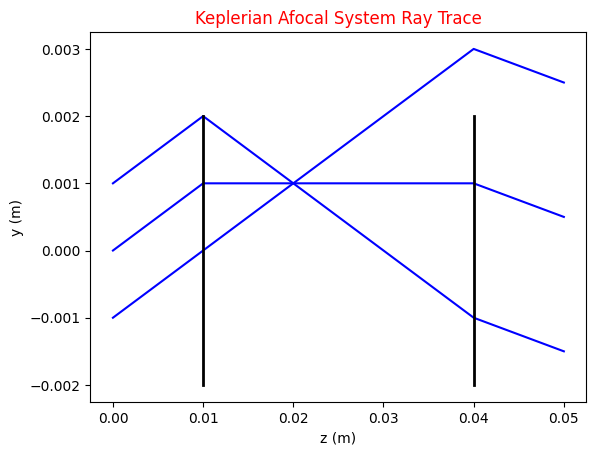

In [4]:
# Keplerian afocal parallel rays (f1=10mm, f2=20mm)
zf = np.array([f1, f1, f1 + f2, f2, 0.5 * f2])
zf_type = ['z', 'f', 'z', 'f', 'z']

th1 = 0.1
H_top = D / 2
H_mid = 0.0
H_bot = -D / 2

rays = []
for H in (H_top, H_mid, H_bot):
    a = np.array([[H], [th1]])
    trace = ABCD_trace(a, zf, zf_type)
    rays.append((trace[1, :], trace[0, :]))

z_lens1 = np.array([f1, f1])
y_lens1 = np.array([-D, D])
z_lens2 = np.array([2 * f1 + f2, 2 * f1 + f2])
y_lens2 = np.array([-D, D])

for z, y in rays:
    plt.plot(z, y, 'b')
plt.plot(z_lens1, y_lens1, 'k', linewidth=2)
plt.plot(z_lens2, y_lens2, 'k', linewidth=2)
plt.title("Keplerian Afocal System Ray Trace", color='red')
plt.xlabel("z (m)")
plt.ylabel("y (m)")
plt.show()

<div style="border:4px solid red">

**HW2:** What is the ratio of the output to the incident angle?  Call the answer hw2.

In [5]:
# ratio of output to input angle
hw2 = -f1 / f2
print(f"hw2 (ratio of output to input angle): {hw2:.2f}")


hw2 (ratio of output to input angle): -0.50


Notice that the angle is inverted.  If the initial angle is going up then after the afocal the output angle is going down.  This means that the image will be inverted.  Becacause the image is inverted binoculars often uses prisms to inverter the image again.


<img src="binoculars_prism.avif" width="500">



## Galilean Afocal

Two lenses with one positive and one negative focal length.  The separation of the lenses is the sum of the two focal lengths.

Plot a parallel bundle of rays through the lens system.

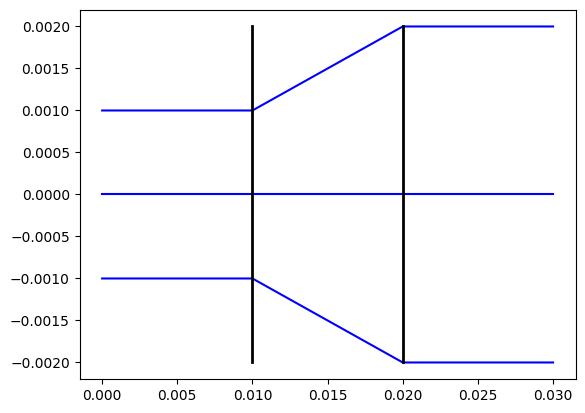

In [6]:
#Galilean Telescope
f1=-10e-3  #focal length in meters
f2=20e-3  #focal length in meters
D=2e-3
#plot a set of parallel rays through an optical system
zf=np.array([-f1, f1, f1+f2, f2, 0.5*f2])  #free space and lens focal lengths
zf_type=['z', 'f', 'z', 'f', 'z']

th1=0
H1=D/2
H2=-D/2
a=np.array([[H1], [th1]])  #initial ray height 10
trace=ABCD_trace(a,zf, zf_type)
z1=trace[1,:]
y1=trace[0,:]

a=np.array([[H2], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z2=trace[1,:]
y2=trace[0,:]

a=np.array([[0], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z3=trace[1,:]
y3=trace[0,:]

z_lens1=np.array([-f1, -f1])
y_lens1=np.array([-D, D])

z_lens2=np.array([f2, f2])
y_lens2=np.array([-D, D])


plt.plot(z1, y1, 'b')
plt.plot(z2, y2, 'b')
plt.plot(z3, y3, 'b')
plt.plot(z_lens1, y_lens1, 'k', linewidth=2)
plt.plot(z_lens2, y_lens2, 'k', linewidth=2)
plt.show()


1. A parallel set of rays hits lens 1.  The rays are diverging.  Back tracing the rays results in the rays go through the focus in front of lens 1 (negative focal length).
2. The separation between the two lens is $f1+f2$.  This means that the focus for lens 2 is at the same location as the back traced rays.  ThisThis means that all of the rays will come out parallel.
3. The beam size changes by the ratio of the focal lengths.  $Ratio=\frac{f_2}{|f_1|}$

This can be used to increase or decrease the size of a beam.  

Now let's look at the effect of the afocal on the incident angle.

Use $f_1=-10mm$, $f_2=20mm$, lens separation $z_2=f_1+f_2=10mm$, beam width $D=2mm$, and incident angle $\theta=0.1$.  Create a plot of the ray bundle.

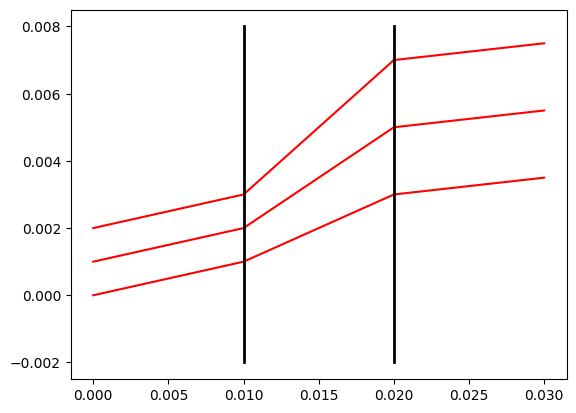

In [7]:
f1=-10e-3  #focal length in meters
f2=20e-3  #focal length in meters
D=2e-3
th1=0.1

#plot a set of parallel rays through an optical system
zf=np.array([-f1, f1, f1+f2, f2, 0.5*f2])  #free space and lens focal lengths
zf_type=['z', 'f', 'z', 'f', 'z']

H1=D/2-f1*th1
H2=0-f1*th1
H3=-D/2-f1*th1

a=np.array([[H1], [th1]])  #initial ray height 10
trace=ABCD_trace(a,zf, zf_type)
z4=trace[1,:]
y4=trace[0,:]

a=np.array([[H2], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z5=trace[1,:]
y5=trace[0,:]

a=np.array([[H3], [th1]])  #initial ray height 11
trace=ABCD_trace(a,zf, zf_type)
z6=trace[1,:]
y6=trace[0,:]

z_lens1=np.array([-f1, -f1])
y_lens1=np.array([-D, 4*D])

z_lens2=np.array([f2, f2])
y_lens2=np.array([-D, 4*D])

plt.plot(z4, y4, 'r')
plt.plot(z5, y5, 'r')
plt.plot(z6, y6, 'r')
plt.plot(z_lens1, y_lens1, 'k', linewidth=2)
plt.plot(z_lens2, y_lens2, 'k', linewidth=2)
plt.show()



Notice that the angle is not inverted.  If the initial angle is going up then after the afocal the output angle is still going up.  This means that the image will NOT be inverted. 

<div style="border:4px solid red">

**HW3:** Binoculars have a magnification of 20x.  Design the binoculars using two perfect lenses.  The objective lens (the lens that you look through) has a diameter of 50mm.  The lenses have a minimum f# of 3.  What is the focal length of the lens farthest away from the eyes?  Name the variable hw3.

In [8]:
D1 = 50
F_min = 3
magnification = 20
f1 = -D1 * F_min
f2 = -f1 * magnification

print(f"f1: {f1:.2f} mm")
print(f"f2: {f2:.2f} mm")


hw3 = f1

f1: -150.00 mm
f2: 3000.00 mm


<div style="border:4px solid red">

**HW4:** Binoculars have a magnification of 20x.  Design the binoculars using two perfect lenses.  The objective lens (the lens that you look through) has a diameter of 50mm.  The lenses have a minimum f# of 3.  What is the focal length of the lens closest to the eyes?  Name the variable hw4.

In [9]:
hw4 = f2
print(f"hw4 (f2): {hw4:.2f} mm")

hw4 (f2): 3000.00 mm


<div style="border:4px solid red">

**HW5:** Binoculars have a magnification of 20x.  Design the binoculars using two perfect lenses.  The objective lens (the lens that you look through) has a diameter of 50mm.  The lenses have a minimum f# of 3.  What is the separation of the lenses?  Name the variable hw5.

In [10]:
hw5 = f1+f2
print(f"hw5 (f1+f2): {hw5:.2f} mm")

hw5 (f1+f2): 2850.00 mm


# Zoom Lens

A zoom lens us a focusing lens in combination with an afocal in which the afocal changes magnification.  (See http://en.wikipedia.org/wiki/Zoom_lens and https://www.premiumbeat.com/blog/how-to-use-zoom-lenses/).

<img src="Zoom1.png" width="500">

## Two lens in contact
What happens when two ideal lenses are brought into contact?

The ABCD matrix for a lens is 

$$
M =
\begin{pmatrix}
1 & 0 \\
-\frac{1}{f_1} & 1
\end{pmatrix}.
$$

If we put two lenses together we get

$$
M =
\begin{pmatrix}
1 & 0 \\
-\frac{1}{f_1} & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
-\frac{1}{f_2} & 1
\end{pmatrix}.
$$






Multiplying the two matrices results in

$$
M =
\begin{pmatrix}
1 & 0 \\
-\frac{1}{f_1}-\frac{1}{f_2} & 1
\end{pmatrix}.
$$

The inverse focal lengths add.  The inverse focal length is called the lens power (https://en.wikipedia.org/wiki/Optical_power) and has units of Diopter, D.  So, when two lenses are in close proximity the powers add.

<img src="Zoom.png" width="500">

In the top position the afocal is two lenses.  The first lens has a power of P1+P2 and the second lens is P3.  

In the bottom position the afocal is two lenses.  The first lens has a power of P1 and the second lens is P2+P3.

Let's look at an example of f1=200mm, f2=100mm, and f3=200mm.

In [11]:
f1=200e-3
f2=100e-3
f3=200e-3
P1=1/f1
P2=1/f2
P3=1/f3

#Top position
Ptop1=P1+P2
Ptop2=P3

ftop1=1/Ptop1
ftop2=1/Ptop2
z_top=ftop1+ftop2

print("Top lens separation (m): ", z_top)
print("Afocal ratio: ", ftop2/ftop1)

#Bottom position
Pbot1=P1
Pbot2=P2+P3

fbot1=1/Pbot1
fbot2=1/Pbot2
z_bot=fbot1+fbot2

print("Bottom lens separation (m): ", z_bot)
print("Afocal ratio: ", fbot2/fbot1)

Top lens separation (m):  0.26666666666666666
Afocal ratio:  3.0
Bottom lens separation (m):  0.26666666666666666
Afocal ratio:  0.3333333333333333


Notice:
1. The lens separations are the same
2. The Afocal ratio changes from enlarging to reducing.
3. The focusing lens sees parallel rays coming in so the distance between the focusing lens and the CCD stays the same.
4. The field of view (FOV) changes by the afocal ratio.

<div style="border:4px solid red">

**HW6:** You will be designing and analyzing a zoom lens made using perfect lenses.  Your zoom lens should have a focus range of 7mm < f < 26mm. The image plane (CCD) needs to stay the same distance away from the focusing lens.  This means that with a parallel bundle of rays input into the afocal the output also needs to be parallel. Using ideal lenses the zoom lens works great at the two extremes but in the middle the first lens needs to be adjust a little to maintain parallel in to parallel out.  What is the focal length of lens 1? (Use variables hw6.)

In [12]:
# Symmetric zoom assumption: f1 = f3 and use geometric-mean focus for f4.
f_min = 7.0  # mm
f_max = 26.0  # mm
f4 = (f_min * f_max) ** 0.5
R_top = f_max / f4  # afocal ratio at long focus
P2_over_P1 = R_top - 1.0
f1 = f4  # set scale by matching lens 1 to focusing lens
f2 = f1 / P2_over_P1
f3 = f1
hw6 = f1
print(f"f4: {f4:.2f} mm, R_top: {R_top:.3f}")
print(f"f1: {f1:.2f} mm, f2: {f2:.2f} mm, f3: {f3:.2f} mm")

f4: 13.49 mm, R_top: 1.927
f1: 13.49 mm, f2: 14.55 mm, f3: 13.49 mm


<div style="border:4px solid red">

**HW7:** You will be designing and analyzing a zoom lens made using perfect lenses.  Your zoom lens should have a focus range of 7mm < f < 26mm. The image plane (CCD) needs to stay the same distance away from the focusing lens.  This means that with a parallel bundle of rays input into the afocal the output also needs to be parallel. Using ideal lenses the zoom lens works great at the two extremes but in the middle the first lens needs to be adjust a little to maintain parallel in to parallel out.  What is the focal length of lens 2? (Use variables hw7.)

In [13]:
hw7 = f2

<div style="border:4px solid red">

**HW8:** You will be designing and analyzing a zoom lens made using perfect lenses.  Your zoom lens should have a focus range of 7mm < f < 26mm. The image plane (CCD) needs to stay the same distance away from the focusing lens.  This means that with a parallel bundle of rays input into the afocal the output also needs to be parallel. Using ideal lenses the zoom lens works great at the two extremes but in the middle the first lens needs to be adjust a little to maintain parallel in to parallel out.  What is the focal length of lens 3? (Use variables hw8.)

In [14]:
hw8 = f3

<div style="border:4px solid red">

**HW9:** You will be designing and analyzing a zoom lens made using perfect lenses.  Your zoom lens should have a focus range of 7mm < f < 26mm. The image plane (CCD) needs to stay the same distance away from the focusing lens.  This means that with a parallel bundle of rays input into the afocal the output also needs to be parallel. Using ideal lenses the zoom lens works great at the two extremes but in the middle the first lens needs to be adjust a little to maintain parallel in to parallel out.  What is the focal length of lens 4? (Use variables hw9.)

In [15]:
hw9 = f4

<div style="border:4px solid red">

**HW10:** You will be designing and analyzing a zoom lens made using perfect lenses.  Your zoom lens should have a focus range of 7mm < f < 26mm. The image plane (CCD) needs to stay the same distance away from the focusing lens.  This means that with a parallel bundle of rays input into the afocal the output also needs to be parallel. Using ideal lenses the zoom lens works great at the two extremes but in the middle the first lens needs to be adjust a little to maintain parallel in to parallel out.  Create an array for the distances between the lenses. (Use variables hw10A for the array of distances between lens 1 and lens 2. Use variables hw10B for the corresponding distances between lens 2 and lens 3.)  The first three lenses needs to be an afocal (parallel in and parallel out).  The sum of the two arrays need to be equal at the two extremes.

d1_min: 0.000000 m, d1_max: 20.490738 m
hw10A (m): [ 0.          2.04907376  4.09814751  6.14722127  8.19629503 10.24536878
 12.29444254 14.34351629 16.39259005 18.44166381 20.49073756]
hw10B (m): [2.04907376e+01 1.98955709e+01 1.91985289e+01 1.83710061e+01
 1.73725818e+01 1.61442175e+01 1.45961418e+01 1.25848624e+01
 9.86591068e+00 5.98605816e+00 1.77635684e-15]
sum endpoints (m): 20.49073756323204 26.389586255677628 20.490737563232045


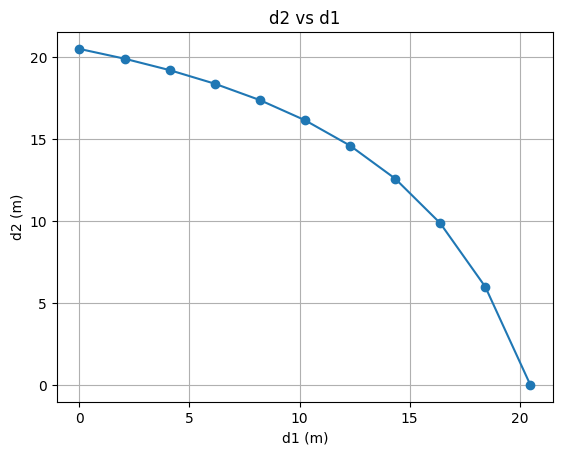

In [20]:
# Distances between lenses 1-2 (hw10A) and 2-3 (hw10B) with afocal constraint at each step.
P1 = 1 / f1
P2 = 1 / f2
P3 = 1 / f3

# Solve d2 from afocal condition C=0 for a 3-lens group: L3 * S2 * L2 * S1 * L1.
# d2 = f3 - A2/C2 where A2 = 1 - d1/f1 and C2 = d1/(f1*f2) - (1/f2 + 1/f1).
def d2_from_d1(d1):
    A2 = 1 - d1 / f1
    C2 = d1 / (f1 * f2) - (1 / f2 + 1 / f1)
    return f3 - A2 / C2

# Endpoints where one spacing is zero (lens contact).
d1_min = 0.0
d1_max = (f1 * f2 + f3 * (f1 + f2)) / (f2 + f3)

steps = 11
hw10A = np.linspace(d1_min, d1_max, steps)
hw10B = d2_from_d1(hw10A)

print(f"d1_min: {d1_min:.6f} m, d1_max: {d1_max:.6f} m")
print("hw10A (m):", hw10A)
print("hw10B (m):", hw10B)
print("sum endpoints (m):", hw10A[0] + hw10B[0], hw10A[5] + hw10B[5], hw10A[-1] + hw10B[-1])

plt.plot(hw10A, hw10B, marker='o')
plt.xlabel("d1 (m)")
plt.ylabel("d2 (m)")
plt.title("d2 vs d1")
plt.grid(True)
plt.show()